In [13]:
# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [14]:
# Step 2: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# Display the shape of the dataset
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Testing data shape:", X_test.shape)   # (10000, 28, 28)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [16]:
# Step 3: Preprocess the data
# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [17]:
# Reshape data to add a channel dimension (required for CNN)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [18]:
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
# Step 4: Build the CNN model
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Explicitly define the input shape
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

In [20]:
# Display the model summary
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.8511 - loss: 0.4964 - val_accuracy: 0.9752 - val_loss: 0.0804
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9814 - loss: 0.0593 - val_accuracy: 0.9826 - val_loss: 0.0621
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9858 - val_loss: 0.0467
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9855 - val_loss: 0.0489
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9888 - val_loss: 0.0400
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9932 - loss: 0.0192 - val_accuracy: 0.9902 - val_loss: 0.0363
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9866 - val_loss: 0.0487
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9950 - loss: 0.0148 - 

In [23]:
# Step 7: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9868 - loss: 0.0491

Test Accuracy: 0.9900


In [24]:
# Step 8: Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [25]:
# Step 9: Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 977    0    0    0    2    0    0    1    0    0]
 [   0 1126    0    3    0    0    1    3    2    0]
 [   5    0 1016    0    5    0    0    6    0    0]
 [   0    1    1 1003    0    3    0    0    2    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    4    0  875    3    1    3    5]
 [   6    2    0    0    4    0  946    0    0    0]
 [   0    3    1    0    0    0    0 1019    1    4]
 [   2    0    1    0    0    0    0    0  969    2]
 [   1    0    0    0    5    1    0    2   10  990]]


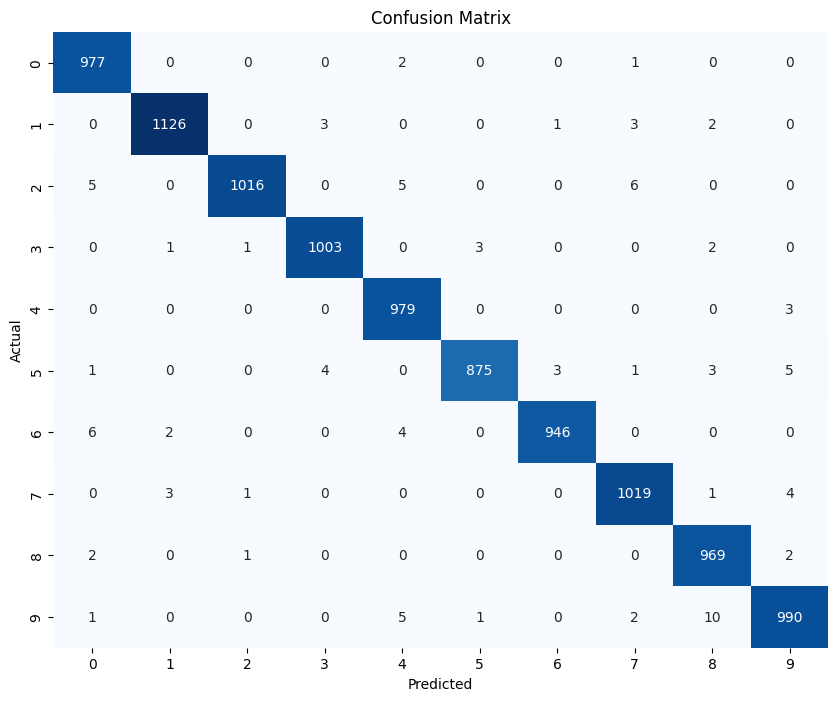

In [26]:
# Step 10: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Step 11: Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



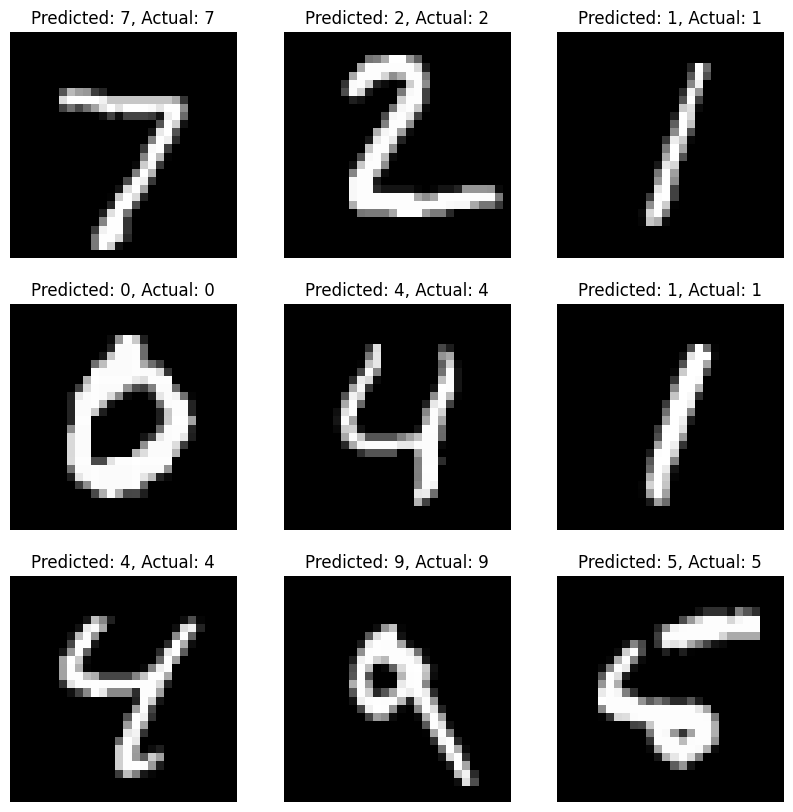

In [28]:
# Step 12: Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}, Actual: {y_true_classes[i]}")
    plt.axis('off')
plt.show()